In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import inspect

# audio.py
import audio

In [2]:
rate = 16000
ms = 1000

# (周波数、振幅)
wave_params = [(100, 100),
               (200, 200),
               (300, 300),
               (400, 400),
               (500, 500),
               (600, 600)]
                
data = sum(audio.sin_wave(k, rate, ms) * a 
           for k, a 
           in wave_params)

A = audio.Audio(rate, data)

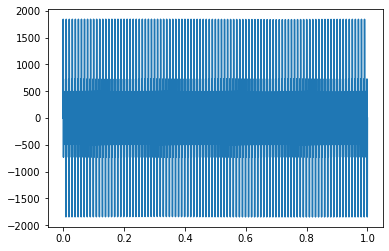

In [3]:
A.plot()

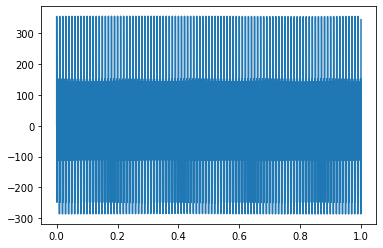

In [4]:
A_f = A.high_path_filtered()
A_f.plot()

In [5]:
frame_lengths = list(audio.frame_candidates(rate, 20, 100))
print(frame_lengths)
frame_length = frame_lengths[1]
hamming = np.hamming(frame_length)
freq = np.fft.rfftfreq(frame_length, d=1/rate)

[512, 1024]


In [6]:
def my_process(a):
    D = np.array(list(audio.stft(a, hamming, 10)))
    print(D.shape)
    ffted = D[0]
    plt.plot(freq, np.abs(ffted))

(94, 513)
(94, 513)


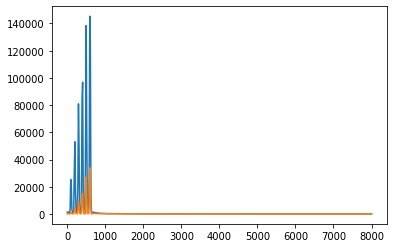

In [7]:
my_process(A)
my_process(A_f)

In [8]:
#librosaのと比較
import librosa

def librosa_process(a):
    data = a.data
    hop_length = rate * 10 // 1000
    D = librosa.stft(data, n_fft=frame_length, hop_length=hop_length)
    print(D.shape)
    ffted = D[:, 0]
    plt.plot(freq, np.abs(ffted))

(513, 101)
(513, 101)


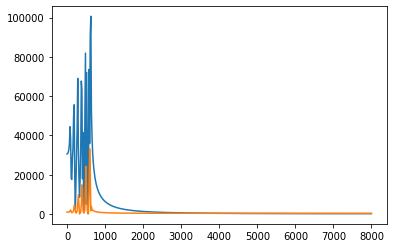

In [9]:
librosa_process(A)
librosa_process(A_f)

使い方間違ってそう・・・・